In [ ]:
Customer segmentation using various clustering algorithm

In [4]:
# importing basic Libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

import warnings
warnings.filterwarnings("ignore")

In [11]:
data = pd.read_csv('Mall_Customers.csv')
print('There are {} rows and {} columns in our dataset'.format(data.shape[0], data.shape[1]))

There are 200 rows and 5 columns in our dataset


In [12]:
data.head()


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [13]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [14]:
data.describe()


,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [15]:
data.isnull().sum()


CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

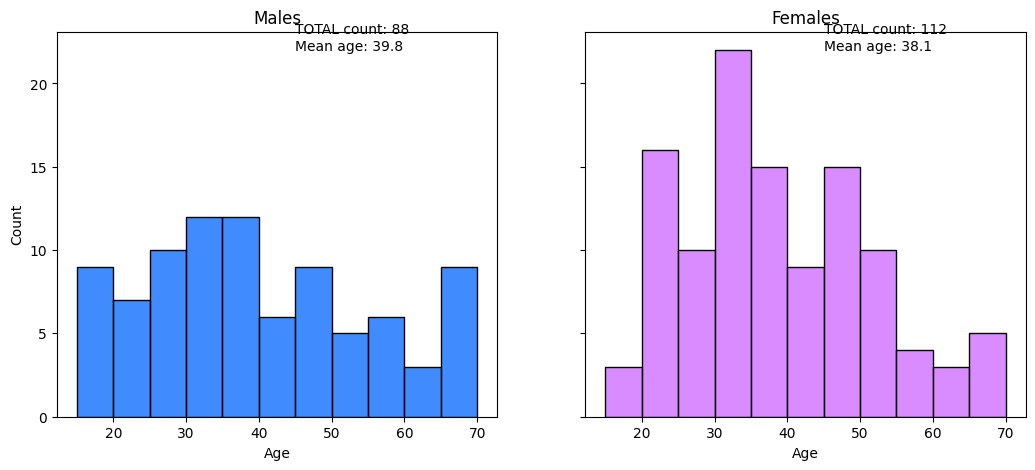

In [16]:
males_age = data[data['Gender'] == 'Male']['Age']
females_age = data[data['Gender'] == 'Female']['Age']

age_bins = range(15, 75, 5)

fig2, (ax1, ax2) = plt.subplots(1, 2, figsize=(12.5, 5), sharey=True)

# Males histogram
sns.histplot(males_age, bins=age_bins, kde=False, color='#0066ff', ax=ax1)
ax1.set_title('Males')
ax1.set_ylabel('Count')
ax1.text(45, 23, "TOTAL count: {}".format(males_age.count()))
ax1.text(45, 22, "Mean age: {:.1f}".format(males_age.mean()))

# Females histogram
sns.histplot(females_age, bins=age_bins, kde=False, color='#cc66ff', ax=ax2)
ax2.set_title('Females')
ax2.set_ylabel('Count')
ax2.text(45, 23, "TOTAL count: {}".format(females_age.count()))
ax2.text(45, 22, "Mean age: {:.1f}".format(females_age.mean()))

plt.show()


In [ ]:
Age Distribution by Gender

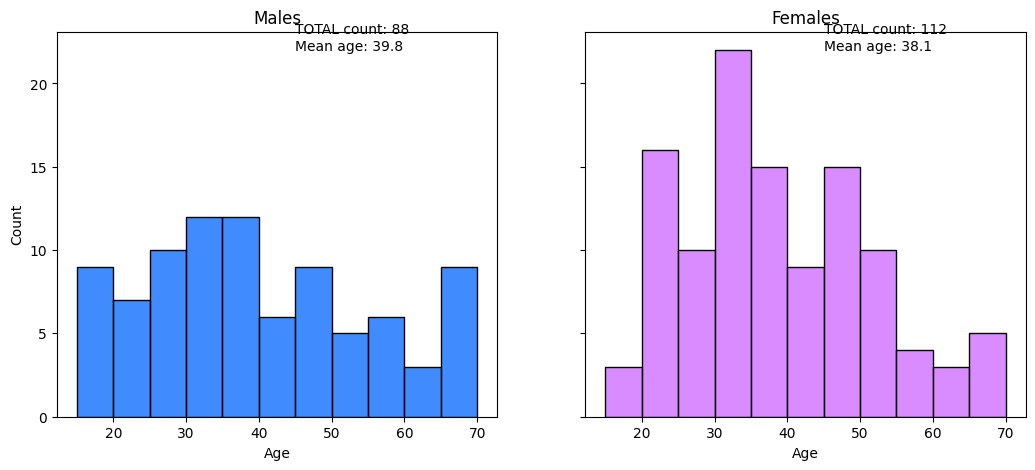

In [17]:
males_age = data[data['Gender'] == 'Male']['Age']
females_age = data[data['Gender'] == 'Female']['Age']

age_bins = range(15, 75, 5)

fig2, (ax1, ax2) = plt.subplots(1, 2, figsize=(12.5, 5), sharey=True)

# Males histogram
sns.histplot(males_age, bins=age_bins, kde=False, color='#0066ff', ax=ax1)
ax1.set_title('Males')
ax1.set_ylabel('Count')
ax1.text(45, 23, "TOTAL count: {}".format(males_age.count()))
ax1.text(45, 22, "Mean age: {:.1f}".format(males_age.mean()))

# Females histogram
sns.histplot(females_age, bins=age_bins, kde=False, color='#cc66ff', ax=ax2)
ax2.set_title('Females')
ax2.set_ylabel('Count')
ax2.text(45, 23, "TOTAL count: {}".format(females_age.count()))
ax2.text(45, 22, "Mean age: {:.1f}".format(females_age.mean()))

plt.show()


In [ ]:
Step 8: Kolmogorov-Smirnov Test on Age

In [18]:
print('Kolgomorov-Smirnov test p-value: {:.2f}'.format(
    stats.ks_2samp(males_age, females_age)[1]))


Kolgomorov-Smirnov test p-value: 0.49


In [ ]:
Step 9: Gender Pie Chart

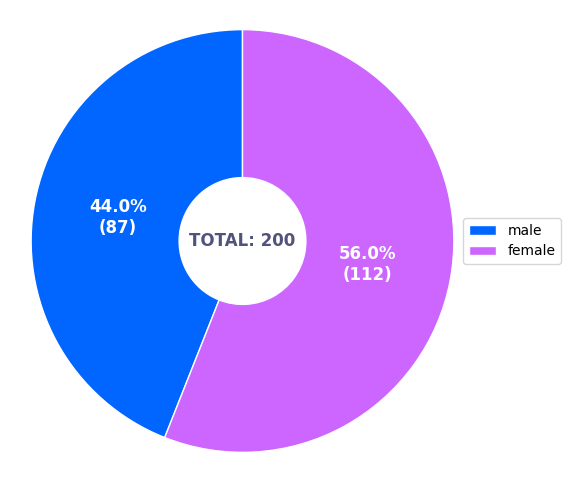

In [19]:
def labeler(pct, allvals):
    absolute = int(pct / 100. * np.sum(allvals))
    return "{:.1f}%\n({:d})".format(pct, absolute)

sizes = [males_age.count(), females_age.count()]
fig9, ax1 = plt.subplots(figsize=(6,6))
wedges, texts, autotexts = ax1.pie(sizes, autopct=lambda pct: labeler(pct, sizes),
                                   radius=1, colors=['#0066ff', '#cc66ff'], startangle=90,
                                   textprops=dict(color="w"), wedgeprops=dict(width=0.7, edgecolor='w'))

ax1.legend(wedges, ['male', 'female'], loc="center right", bbox_to_anchor=(0.7, 0, 0.5, 1))
plt.text(0, 0, 'TOTAL: {}'.format(data['Age'].count()), size=12, color='#52527a', ha='center', va='center', weight='bold')
plt.setp(autotexts, size=12, weight='bold')
ax1.axis('equal')
plt.show()


In [ ]:
Step 10: Income Distribution by Gender

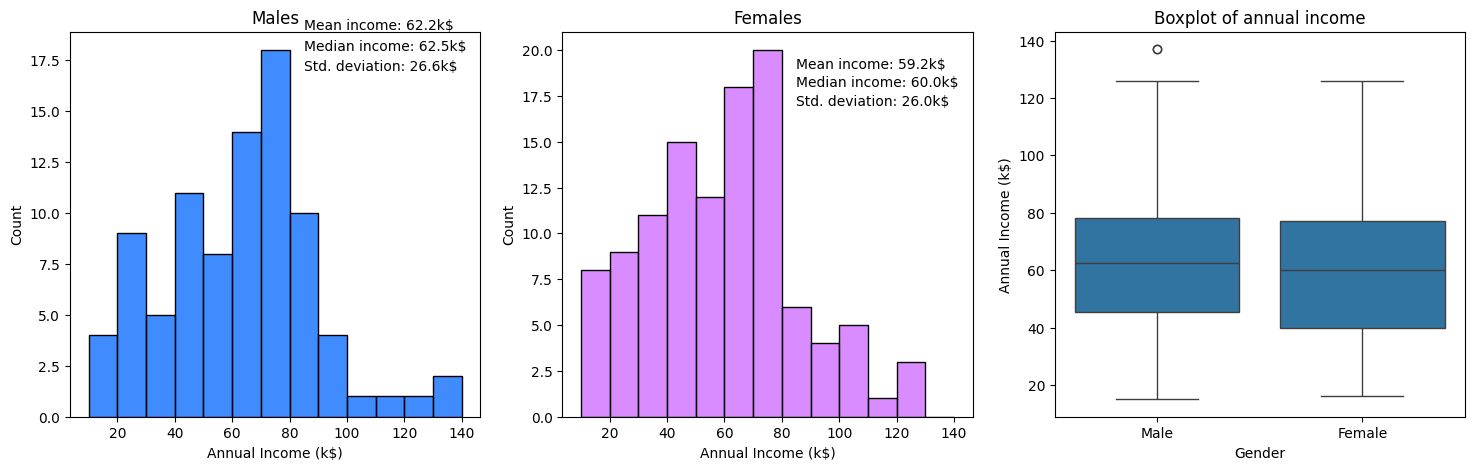

In [20]:
males_income = data[data['Gender'] == 'Male']['Annual Income (k$)']
females_income = data[data['Gender'] == 'Female']['Annual Income (k$)']
my_bins = range(10, 150, 10)

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 5))

# Males histogram
sns.histplot(males_income, bins=my_bins, kde=False, color='#0066ff', ax=ax1)
ax1.set_title('Males')
ax1.set_ylabel('Count')
ax1.text(85, 19, "Mean income: {:.1f}k$".format(males_income.mean()))
ax1.text(85, 18, "Median income: {:.1f}k$".format(males_income.median()))
ax1.text(85, 17, "Std. deviation: {:.1f}k$".format(males_income.std()))

# Females histogram
sns.histplot(females_income, bins=my_bins, kde=False, color='#cc66ff', ax=ax2)
ax2.set_title('Females')
ax2.set_ylabel('Count')
ax2.text(85, 19, "Mean income: {:.1f}k$".format(females_income.mean()))
ax2.text(85, 18, "Median income: {:.1f}k$".format(females_income.median()))
ax2.text(85, 17, "Std. deviation: {:.1f}k$".format(females_income.std()))

# Boxplot
sns.boxplot(x='Gender', y='Annual Income (k$)', data=data, ax=ax3)
ax3.set_title('Boxplot of annual income')

plt.show()


In [ ]:
Step 11: Kolmogorov-Smirnov Test on Income

In [21]:
print('Kolgomorov-Smirnov test p-value: {:.2f}'.format(
    stats.ks_2samp(males_income, females_income)[1]))


Kolgomorov-Smirnov test p-value: 0.78


Kolmogorov–Smirnov test p-value: 0.29

A mean spending score for women (51.5) is higher than men (48.5). K–S p-value = 0.29


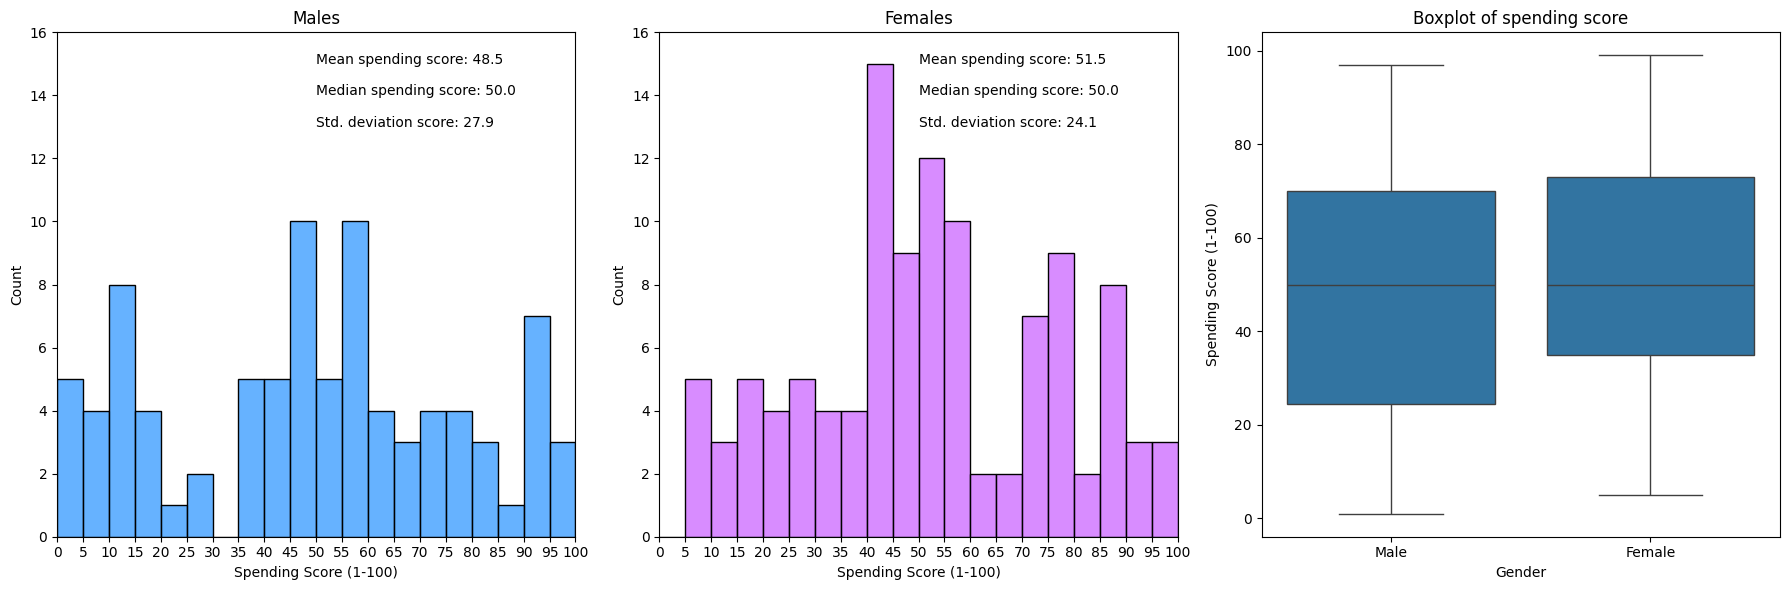

In [22]:


# Separate spending score by gender
males_spending = data.loc[data['Gender'] == 'Male', 'Spending Score (1-100)']
females_spending = data.loc[data['Gender'] == 'Female', 'Spending Score (1-100)']

# Perform Kolmogorov–Smirnov Test
ks_stat, ks_p = stats.ks_2samp(males_spending, females_spending)

# Print K–S result
print(f'Kolmogorov–Smirnov test p-value: {ks_p:.2f}')
print(f'\nA mean spending score for women ({females_spending.mean():.1f}) '
      f'is higher than men ({males_spending.mean():.1f}). '
      f'K–S p-value = {ks_p:.2f}')

# Create histograms and boxplot
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))

spending_bins = range(0, 101, 5)

# Males histogram
sns.histplot(males_spending, bins=spending_bins, kde=False, color="#3399ff", ax=ax1, edgecolor='k', linewidth=1.0)
ax1.set_xticks(spending_bins)
ax1.set_xlim(0, 100)
ax1.set_ylim(0, 16)
ax1.set_title('Males')
ax1.set_ylabel('Count')
ax1.text(50, 15, "Mean spending score: {:.1f}".format(males_spending.mean()))
ax1.text(50, 14, "Median spending score: {:.1f}".format(males_spending.median()))
ax1.text(50, 13, "Std. deviation score: {:.1f}".format(males_spending.std()))

# Females histogram
sns.histplot(females_spending, bins=spending_bins, kde=False, color="#cc66ff", ax=ax2, edgecolor='k', linewidth=1.0)
ax2.set_xticks(spending_bins)
ax2.set_xlim(0, 100)
ax2.set_ylim(0, 16)
ax2.set_title('Females')
ax2.set_ylabel('Count')
ax2.text(50, 15, "Mean spending score: {:.1f}".format(females_spending.mean()))
ax2.text(50, 14, "Median spending score: {:.1f}".format(females_spending.median()))
ax2.text(50, 13, "Std. deviation score: {:.1f}".format(females_spending.std()))

# Boxplot
sns.boxplot(x='Gender', y='Spending Score (1-100)', data=data, ax=ax3)
ax3.set_title('Boxplot of spending score')

# Show all plots
plt.tight_layout()
plt.show()


In [25]:
print('Kolgomorov-Smirnov test p-value: {:.2f}'.format(stats.ks_2samp(males_spending, females_spending)[1]))


Kolgomorov-Smirnov test p-value: 0.29


In [23]:
medians_by_age_group = data.groupby(["Gender", pd.cut(data['Age'], age_bins)]).median()
medians_by_age_group.index = medians_by_age_group.index.set_names(['Gender', 'Age_group'])
medians_by_age_group.reset_index(inplace=True)


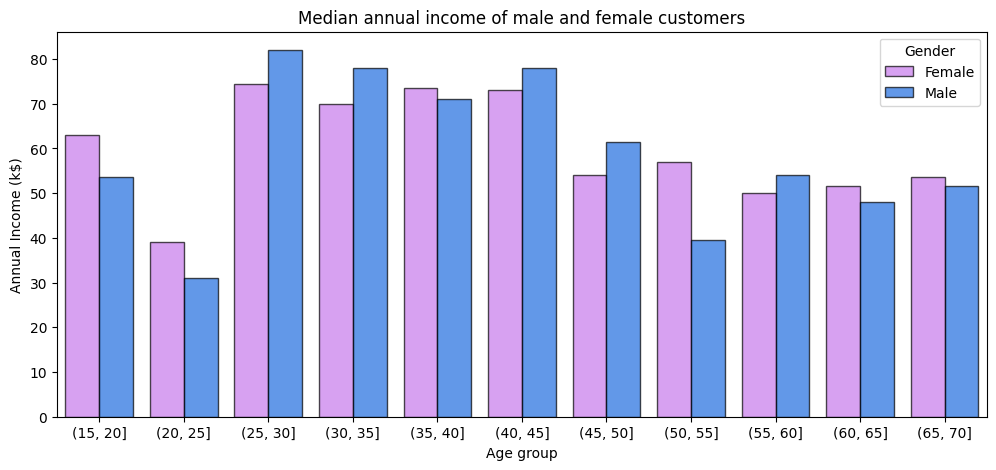

In [24]:
fig, ax = plt.subplots(figsize=(12, 5))
sns.barplot(x='Age_group', y='Annual Income (k$)', hue='Gender', data=medians_by_age_group,
            palette=['#cc66ff', '#0066ff'],
            alpha=0.7, edgecolor='k',
            ax=ax)
ax.set_title('Median annual income of male and female customers')
ax.set_xlabel('Age group')
plt.show()

In [ ]:
Correlations

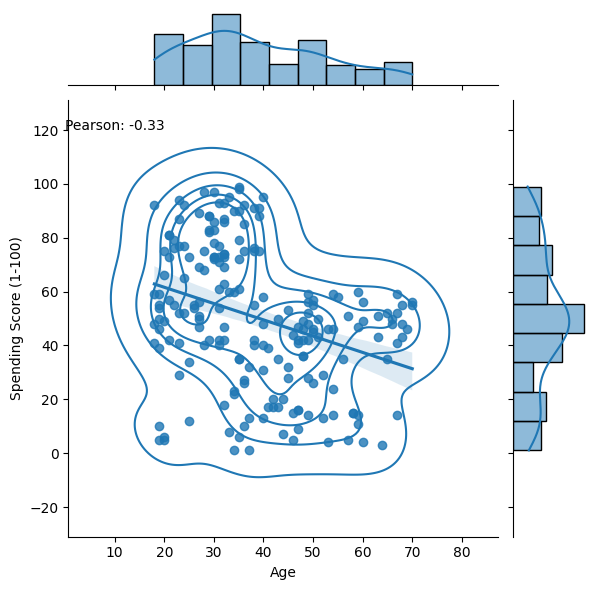

In [29]:
from scipy.stats import pearsonr

# calculating Pearson's correlation
corr, _ = pearsonr(data['Age'], data['Spending Score (1-100)'])

jp = sns.jointplot(x='Age', y='Spending Score (1-100)', data=data, kind='reg')
jp.plot_joint(sns.kdeplot, zorder=0, n_levels=6)

plt.text(0, 120, 'Pearson: {:.2f}'.format(corr))
plt.show()


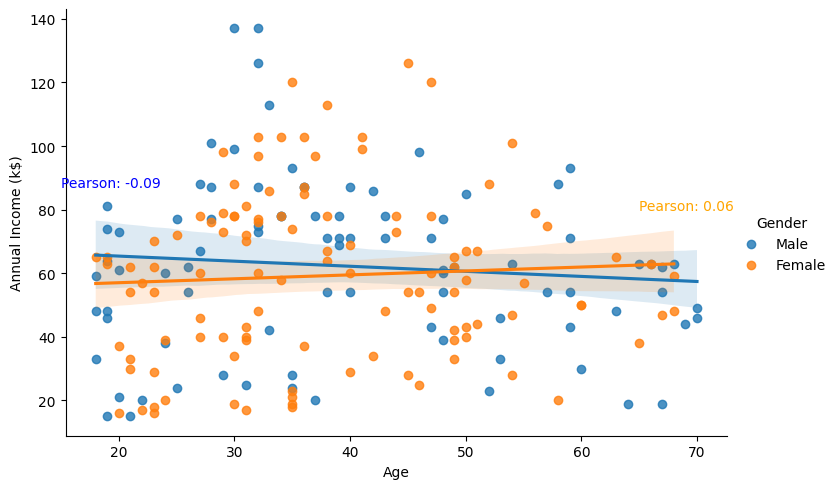

In [31]:
# calculating Pearson's correlations
corr1, _ = pearsonr(males_age.values, males_income.values)
corr2, _ = pearsonr(females_age.values, females_income.values)

sns.lmplot(x='Age', y='Annual Income (k$)', data=data, hue='Gender', aspect=1.5)

plt.text(15, 87, 'Pearson: {:.2f}'.format(corr1), color='blue')
plt.text(65, 80, 'Pearson: {:.2f}'.format(corr2), color='orange')

plt.show()


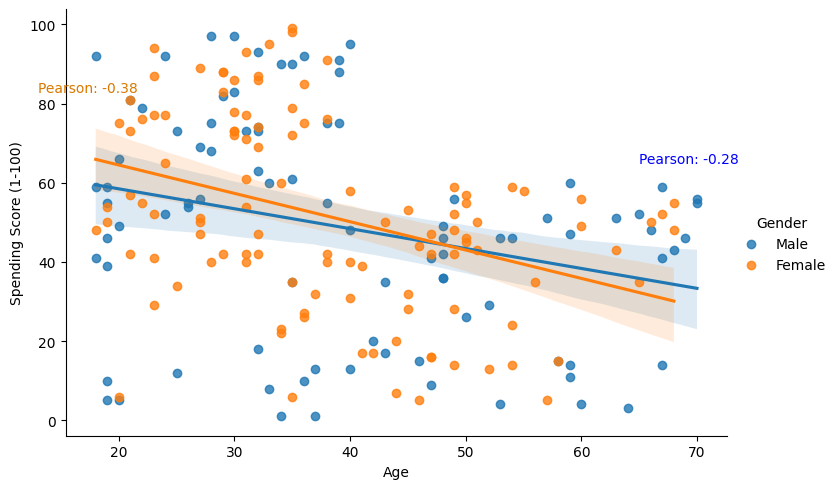

In [32]:
# calculating Pearson's correlations
corr1, _ = pearsonr(males_age.values, males_spending.values)
corr2, _ = pearsonr(females_age.values, females_spending.values)

sns.lmplot(x='Age', y='Spending Score (1-100)', data=data, hue='Gender', aspect=1.5)

plt.text(65, 65, 'Pearson: {:.2f}'.format(corr1), color='blue')
plt.text(13, 83, 'Pearson: {:.2f}'.format(corr2), color='#d97900')

plt.show()


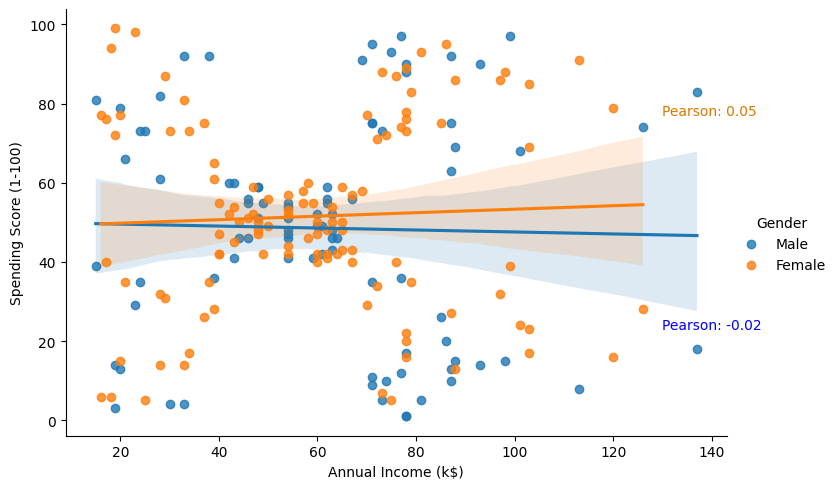

In [33]:
# calculating Pearson's correlations
corr1, _ = pearsonr(males_income.values, males_spending.values)
corr2, _ = pearsonr(females_income.values, females_spending.values)

sns.lmplot(x='Annual Income (k$)', y='Spending Score (1-100)', data=data, hue='Gender',
           aspect=1.5)

plt.text(130, 23, 'Pearson: {:.2f}'.format(corr1), color='blue')
plt.text(130, 77, 'Pearson: {:.2f}'.format(corr2), color='#d97900')

plt.show()


In [ ]:
KMeans

In [35]:
from sklearn.cluster import KMeans


In [36]:
X_numerics = data[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]  # subset with numeric variables only


In [37]:
from sklearn.metrics import silhouette_score
n_clusters = [2,3,4,5,6,7,8,9,10]  # number of clusters
clusters_inertia = []  # inertia of clusters
s_scores = []  # silhouette scores

for n in n_clusters:
    KM_est = KMeans(n_clusters=n, init='k-means++').fit(X_numerics)
    clusters_inertia.append(KM_est.inertia_)       # data for the elbow method
    silhouette_avg = silhouette_score(X_numerics, KM_est.labels_)
    s_scores.append(silhouette_avg)  # data for the silhouette score method


In [ ]:
The graph below shows the inertia for selected range of clusters.

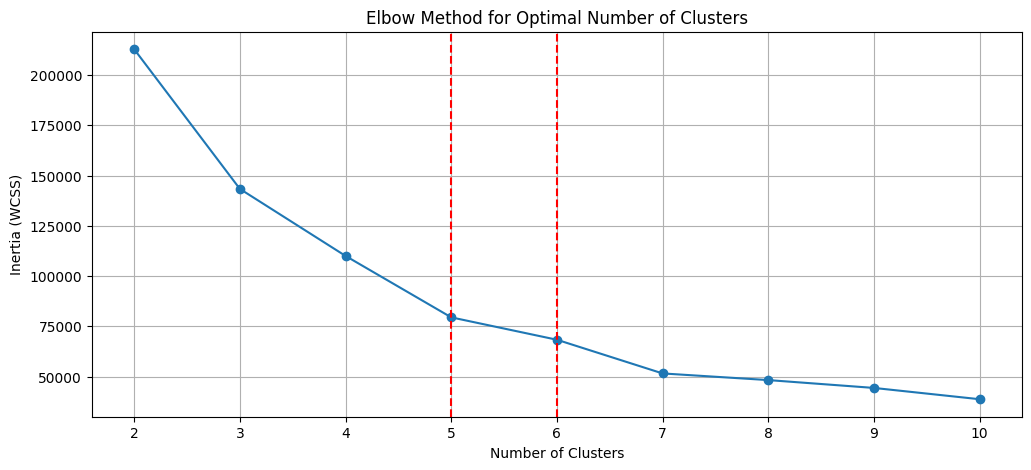

In [41]:
# Plot the elbow graph
fig, ax = plt.subplots(figsize=(12, 5))
ax.plot(n_clusters, clusters_inertia, marker='o')
ax.set_title("Elbow Method for Optimal Number of Clusters")
ax.set_xlabel("Number of Clusters")
ax.set_ylabel("Inertia (WCSS)")
ax.axvline(5, ls="--", c="red") 
ax.axvline(6, ls="--", c="red")  # Vertical line at 6 clusters (for example)
plt.grid(True)
plt.show()

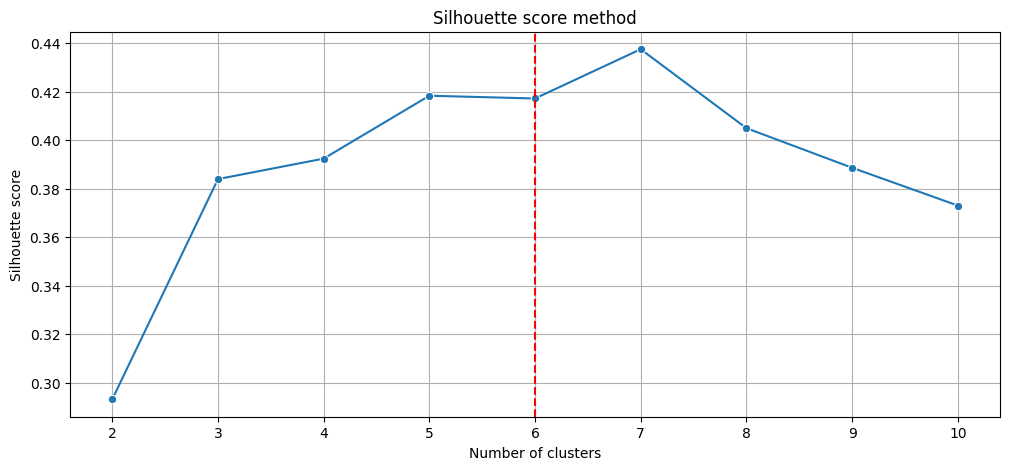

In [39]:
fig, ax = plt.subplots(figsize=(12, 5))
sns.lineplot(x=n_clusters, y=s_scores, marker='o', ax=ax)  # Corrected: x= and y= specified
ax.set_title("Silhouette score method")
ax.set_xlabel("Number of clusters")
ax.set_ylabel("Silhouette score")
ax.axvline(6, ls="--", c="red")  # Add vertical line at 6 clusters
plt.grid()
plt.show()



In [42]:
KM_5_clusters = KMeans(n_clusters=5, init='k-means++').fit(X_numerics)  # Initialize and fit K-Means model
KM_5_clustered = X_numerics.copy()
KM_5_clustered.loc[:, 'Cluster'] = KM_5_clusters.labels_  # Append labels to points


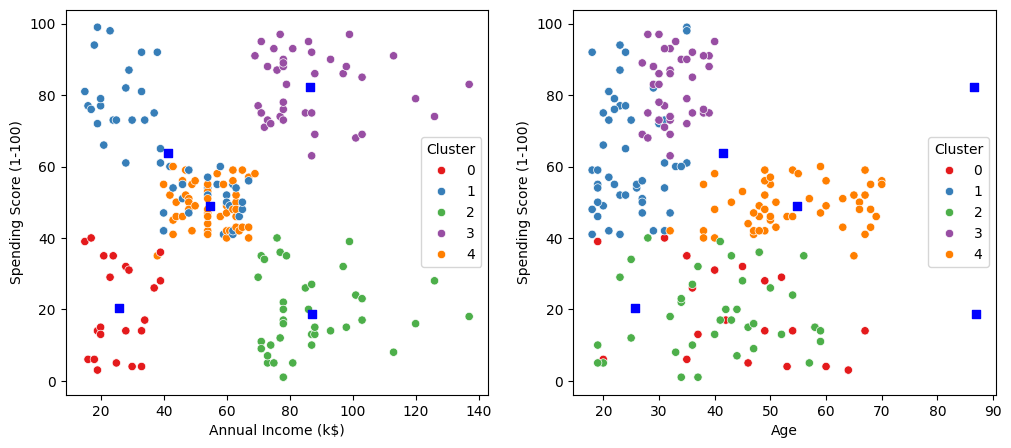

In [44]:
fig1, axes = plt.subplots(1, 2, figsize=(12, 5))

# Scatter plot for Annual Income vs Spending Score
scat_1 = sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', data=KM_5_clustered,
                         hue='Cluster', ax=axes[0], palette='Set1', legend='full')

# Scatter plot for Age vs Spending Score
sns.scatterplot(x='Age', y='Spending Score (1-100)', data=KM_5_clustered,
                hue='Cluster', palette='Set1', ax=axes[1], legend='full')

# Plot the cluster centers
axes[0].scatter(KM_5_clusters.cluster_centers_[:, 1], KM_5_clusters.cluster_centers_[:, 2], 
                marker='s', s=40, c="blue")  # Plotting cluster centers for the first plot

axes[1].scatter(KM_5_clusters.cluster_centers_[:, 1], KM_5_clusters.cluster_centers_[:, 2], 
                marker='s', s=40, c="blue")  # Plotting cluster centers for the second plot

plt.show()


In [50]:
KM5_clust_sizes = KM_5_clustered.groupby('Cluster').size().to_frame()
KM5_clust_sizes.columns = ["KM5_size"]
print(KM5_clust_sizes)

         KM5_size
Cluster          
0              22
1              50
2              38
3              39
4              51


The biggest cluster is cluster number 1, containing 80 observations (medium-medium clients).
There are two smaller clusters, each with 23 observations:Cluster 3: High income and high spending score Cluster 0: Low income and high spending score
The following 3D projection shows the 5 generated clusters. The visualization is static in this environment, but if you run the code in an interactive environment (e.g., Spyder), you can rotate the plot.

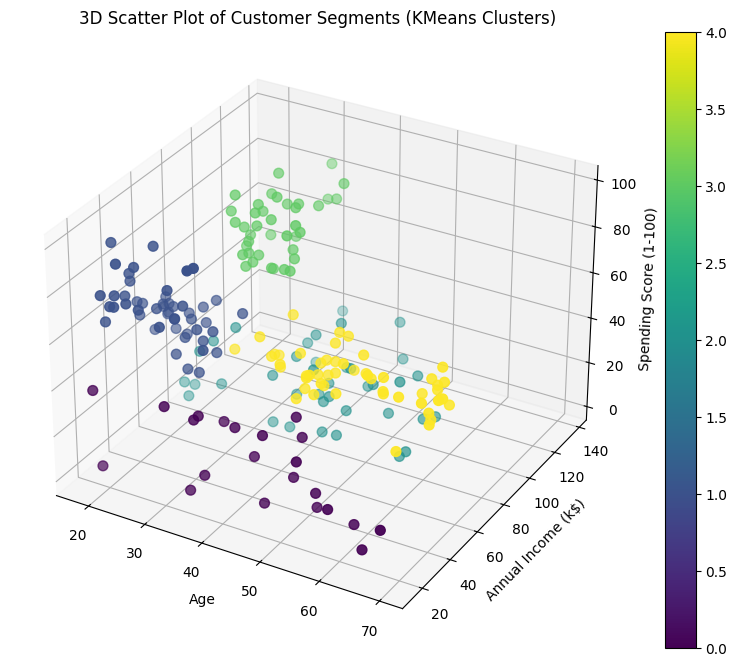

In [53]:
# Import the necessary libraries
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np

# Create a figure for 3D plotting
fig = plt.figure(figsize=(10, 8))

# Create 3D axes
ax = fig.add_subplot(111, projection='3d')

# Scatter plot: X = 'Age', Y = 'Annual Income (k$)', Z = 'Spending Score (1-100)'
scatter = ax.scatter(KM_5_clustered['Age'], KM_5_clustered['Annual Income (k$)'], 
                     KM_5_clustered['Spending Score (1-100)'], c=KM_5_clustered['Cluster'], cmap='viridis', s=50)

# Add color bar for cluster values
fig.colorbar(scatter)

# Set labels for each axis
ax.set_xlabel('Age')
ax.set_ylabel('Annual Income (k$)')
ax.set_zlabel('Spending Score (1-100)')

# Set the title
ax.set_title('3D Scatter Plot of Customer Segments (KMeans Clusters)')

# Display the plot
plt.show()


In [ ]:
Plotly 3D Scatter Plot 

In [11]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import plotly as py
import plotly.graph_objs as go
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have the dataset `data` with relevant columns
# For example, let's assume your data is stored in `data` DataFrame
# Make sure to adjust the column names accordingly

# Example data (replace this with your actual data)
data = pd.read_csv('Mall_Customers.csv')

# Select the numeric columns for clustering
X_numerics = data[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

# Apply KMeans clustering with 5 clusters (adjust if necessary)
kmeans = KMeans(n_clusters=5, init='k-means++')
kmeans.fit(X_numerics)

# Create a new DataFrame with the cluster labels
KM_5_clustered = X_numerics.copy()
KM_5_clustered['Cluster'] = kmeans.labels_

# Now you can create the 3D scatter plot using Plotly
def tracer(db, n, name):
    '''
    This function returns trace object for Plotly
    '''
    return go.Scatter3d(
        x=db[db['Cluster'] == n]['Age'],
        y=db[db['Cluster'] == n]['Spending Score (1-100)'],
        z=db[db['Cluster'] == n]['Annual Income (k$)'],
        mode='markers',
        name=name,
        marker=dict(
            size=5
        )
    )

# Create traces for each cluster
trace0 = tracer(KM_5_clustered, 0, 'Cluster 0')
trace1 = tracer(KM_5_clustered, 1, 'Cluster 1')
trace2 = tracer(KM_5_clustered, 2, 'Cluster 2')
trace3 = tracer(KM_5_clustered, 3, 'Cluster 3')
trace4 = tracer(KM_5_clustered, 4, 'Cluster 4')

# Combine traces into a list
data = [trace0, trace1, trace2, trace3, trace4]

# Create layout for the plot
layout = go.Layout(
    title='Clusters by K-Means',
    scene=dict(
        xaxis=dict(title='Age'),
        yaxis=dict(title='Spending Score'),
        zaxis=dict(title='Annual Income')
    )
)

# Create the figure and plot it
fig = go.Figure(data=data, layout=layout)
py.offline.plot(fig)


'temp-plot.html'

In [12]:
KM6_clusters = KMeans(n_clusters=6, init='k-means++').fit(X_numerics)  # Initialize and fit K-Means model
KM6_clustered = X_numerics.copy()  # Make a copy of the numeric data
KM6_clustered['Cluster'] = KM6_clusters.labels_  # Append the cluster labels


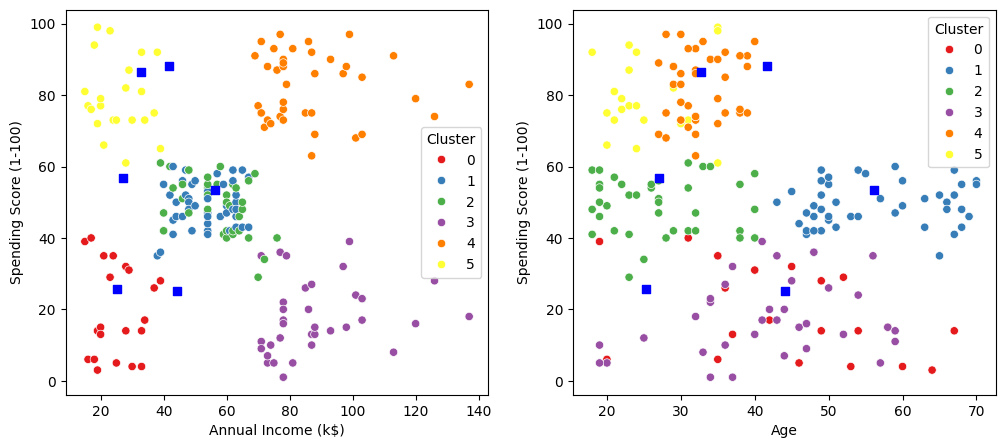

In [14]:
fig11, axes = plt.subplots(1, 2, figsize=(12, 5))

# Scatter plot for Annual Income vs Spending Score (1-100)
sns.scatterplot(data=KM6_clustered, x='Annual Income (k$)', y='Spending Score (1-100)', 
                hue='Cluster', ax=axes[0], palette='Set1', legend='full')

# Scatter plot for Age vs Spending Score (1-100)
sns.scatterplot(data=KM6_clustered, x='Age', y='Spending Score (1-100)', 
                hue='Cluster', ax=axes[1], palette='Set1', legend='full')

# Plotting centroids
axes[0].scatter(KM6_clusters.cluster_centers_[:, 0], KM6_clusters.cluster_centers_[:, 1], 
                marker='s', s=40, c='blue')
axes[1].scatter(KM6_clusters.cluster_centers_[:, 0], KM6_clusters.cluster_centers_[:, 1], 
                marker='s', s=40, c='blue')

plt.show()


In [ ]:
There are no distinct groups in terms of customer age

In [16]:
# Group by 'Cluster' and calculate size (number of members in each cluster)
KM6_clust_sizes = KM6_clustered.groupby('Cluster').size().to_frame()

# Rename the column to "KM6_size"
KM6_clust_sizes.columns = ["KM6_size"]

# Now you can view the cluster sizes
KM6_clust_sizes


,KM6_size
Cluster,
0,21
1,45
2,38
3,35
4,39
5,22


In [17]:
import plotly.graph_objs as go
def tracer(db, n, name):
    return go.Scatter3d(
        x=db[db['Cluster'] == n]['Age'],
        y=db[db['Cluster'] == n]['Spending Score (1-100)'],
        z=db[db['Cluster'] == n]['Annual Income (k$)'],
        mode='markers',
        name=name,
        marker=dict(size=5)
    )
trace0 = tracer(KM6_clustered, 0, 'Cluster 0')
trace1 = tracer(KM6_clustered, 1, 'Cluster 1')
trace2 = tracer(KM6_clustered, 2, 'Cluster 2')
trace3 = tracer(KM6_clustered, 3, 'Cluster 3')
trace4 = tracer(KM6_clustered, 4, 'Cluster 4')
trace5 = tracer(KM6_clustered, 5, 'Cluster 5')

data = [trace0, trace1, trace2, trace3, trace4, trace5]
layout = go.Layout(
    title='Clusters by K-Means',
    scene=dict(
        xaxis=dict(title='Age'),
        yaxis=dict(title='Spending Score'),
        zaxis=dict(title='Annual Income')
    )
)
fig = go.Figure(data=data, layout=layout)
py.offline.plot(fig)


'temp-plot.html'

In [ ]:
DBSCAN

In [29]:
import pandas as pd
from sklearn.cluster import DBSCAN
from itertools import product
import numpy as np
from sklearn.metrics import silhouette_score
import seaborn as sns
import matplotlib.pyplot as plt

# Load your data into a pandas DataFrame (make sure the file path is correct)
data = pd.read_csv('Mall_Customers.csv')  # Replace 'your_data_file.csv' with your actual file name

# Ensure data is a pandas DataFrame
print(data.head())  # Check if the data is loaded correctly

# Select numeric columns
X_numeric = data[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]  # Select numeric columns

# Define eps and min_samples values
eps_values = np.arange(8, 12.75, 0.25)
min_samples = np.arange(3, 10)

# Create combinations of eps and min_samples
DBSCAN_params = list(product(eps_values, min_samples))

# Initialize lists to store results
no_of_clusters = []
sil_score = []

# Run DBSCAN for each combination of parameters
for p in DBSCAN_params:
    DBS_clustering = DBSCAN(eps=p[0], min_samples=p[1]).fit(X_numeric)
    no_of_clusters.append(len(np.unique(DBS_clustering.labels_)))  # number of clusters
    sil_score.append(silhouette_score(X_numeric, DBS_clustering.labels_))  # silhouette scor


   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


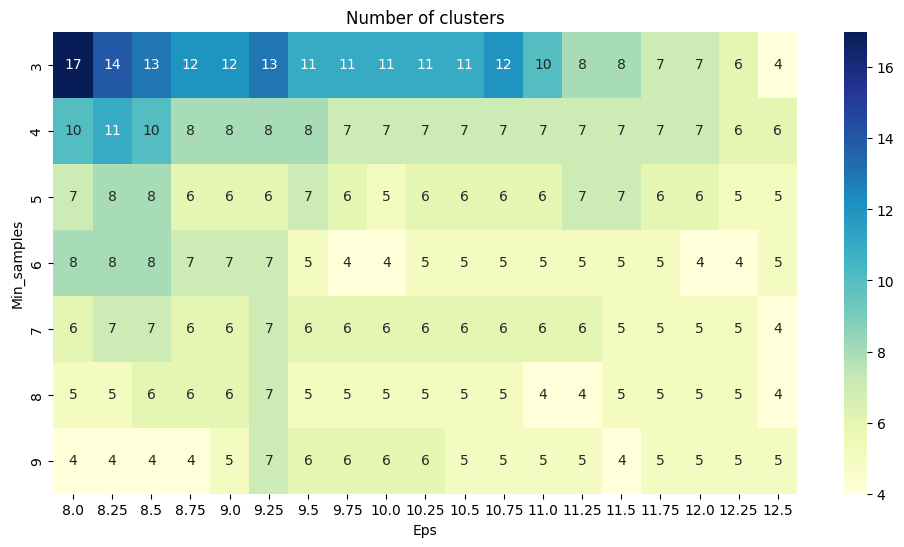

In [27]:
tmp = pd.DataFrame.from_records(DBSCAN_params, columns=['Eps', 'Min_samples'])
tmp['No_of_clusters'] = no_of_clusters  # Add number of clusters column

# Pivot the results for the heatmap (columns = Eps, rows = Min_samples)
pivot_1 = pd.pivot_table(tmp, values='No_of_clusters', index='Min_samples', columns='Eps')

# Plotting the heatmap
fig, ax = plt.subplots(figsize=(12, 6))  # Adjust figure size as needed
sns.heatmap(pivot_1, annot=True, annot_kws={"size": 10}, cmap="YlGnBu", ax=ax)

# Adding title
ax.set_title('Number of clusters')

# Show plot
plt.show()

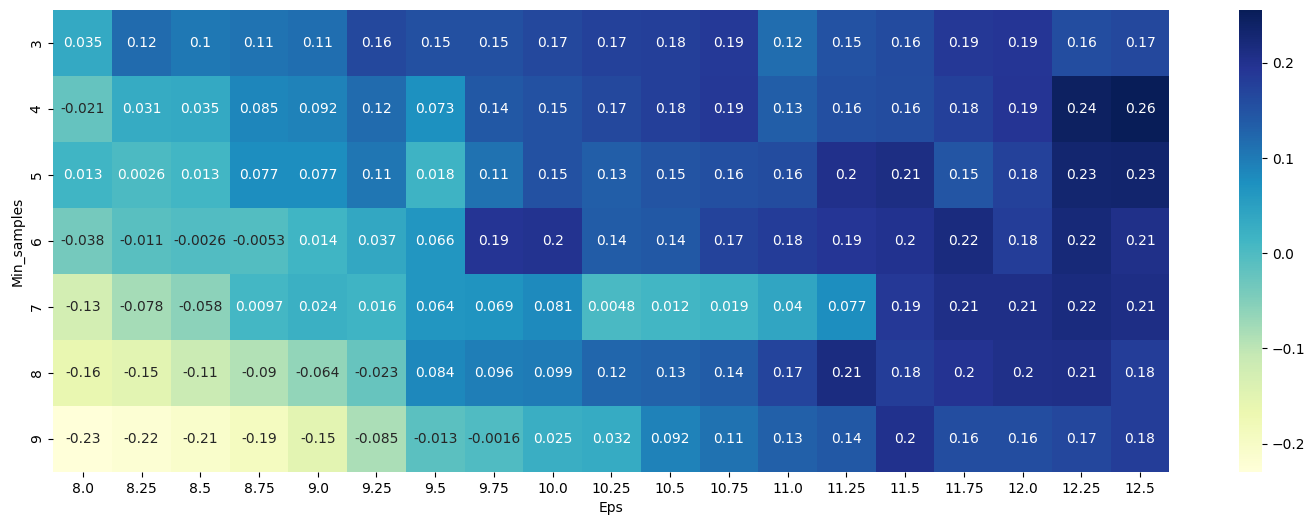

In [28]:
# Create a DataFrame to view the results
tmp = pd.DataFrame(DBSCAN_params, columns=['Eps', 'Min_samples'])
tmp['Sil_score'] = sil_score

# Pivot the DataFrame for heatmap
pivot_1 = pd.pivot_table(tmp, values='Sil_score', index='Min_samples', columns='Eps')

# Plot the heatmap
fig, ax = plt.subplots(figsize=(18, 6))
sns.heatmap(pivot_1, annot=True, annot_kws={"size": 10}, cmap="YlGnBu", ax=ax)
plt.show()

In [30]:
DBSCAN_clustering = DBSCAN(eps=12.5, min_samples=4).fit(X_numeric)

# Append labels (cluster IDs) to the original data
DBSCAN_clustered = X_numeric.copy()
DBSCAN_clustered.loc[:, 'Cluster'] = DBSCAN_clustering.labels_

In [ ]:
Clustera Sizes

In [31]:
# Calculate the sizes of each cluster (how many points belong to each cluster)
DBSCAN_clust_sizes = DBSCAN_clustered.groupby('Cluster').size().to_frame()
DBSCAN_clust_sizes.columns = ["DBSCAN_size"]

# Display the size of each cluster
DBSCAN_clust_sizes

,DBSCAN_size
Cluster,
-1,18
0,112
1,8
2,34
3,24
4,4


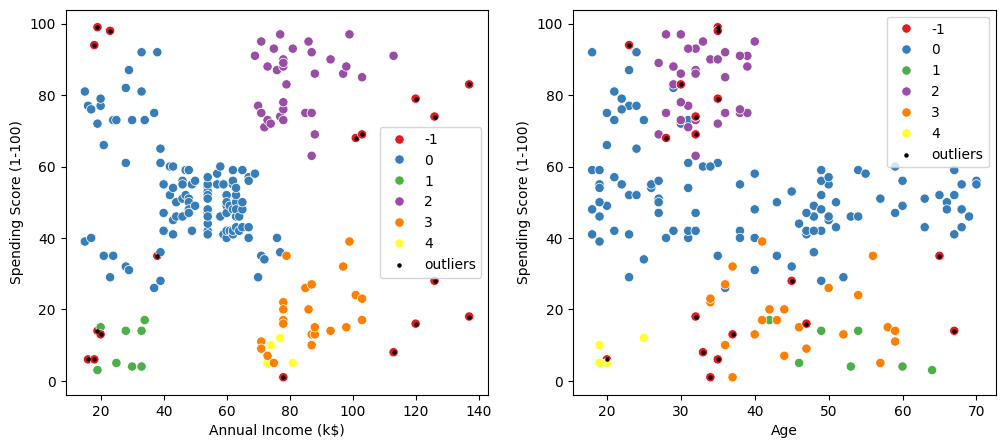

In [34]:
# Extract outliers from the DBSCAN clustering result (Cluster -1)
outliers = DBSCAN_clustered[DBSCAN_clustered['Cluster'] == -1]

# Creating subplots for visualization
fig2, axes = plt.subplots(1, 2, figsize=(12, 5))

# Scatter plot for Annual Income vs Spending Score (x-axis = Annual Income, y-axis = Spending Score)
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', data=DBSCAN_clustered,
                hue='Cluster', ax=axes[0], palette='Set1', legend='full', s=45)

# Scatter plot for Age vs Spending Score (x-axis = Age, y-axis = Spending Score)
sns.scatterplot(x='Age', y='Spending Score (1-100)', data=DBSCAN_clustered,
                hue='Cluster', palette='Set1', ax=axes[1], legend='full', s=45)

# Plotting outliers
axes[0].scatter(outliers['Annual Income (k$)'], outliers['Spending Score (1-100)'], s=5, label='outliers', c='k')
axes[1].scatter(outliers['Age'], outliers['Spending Score (1-100)'], s=5, label='outliers', c='k')

# Displaying legends
axes[0].legend()
axes[1].legend()

# Adjusting font size of the legend
plt.setp(axes[0].get_legend().get_texts(), fontsize=10)
plt.setp(axes[1].get_legend().get_texts(), fontsize=10)

plt.show()


In [ ]:
MEANSHIFT

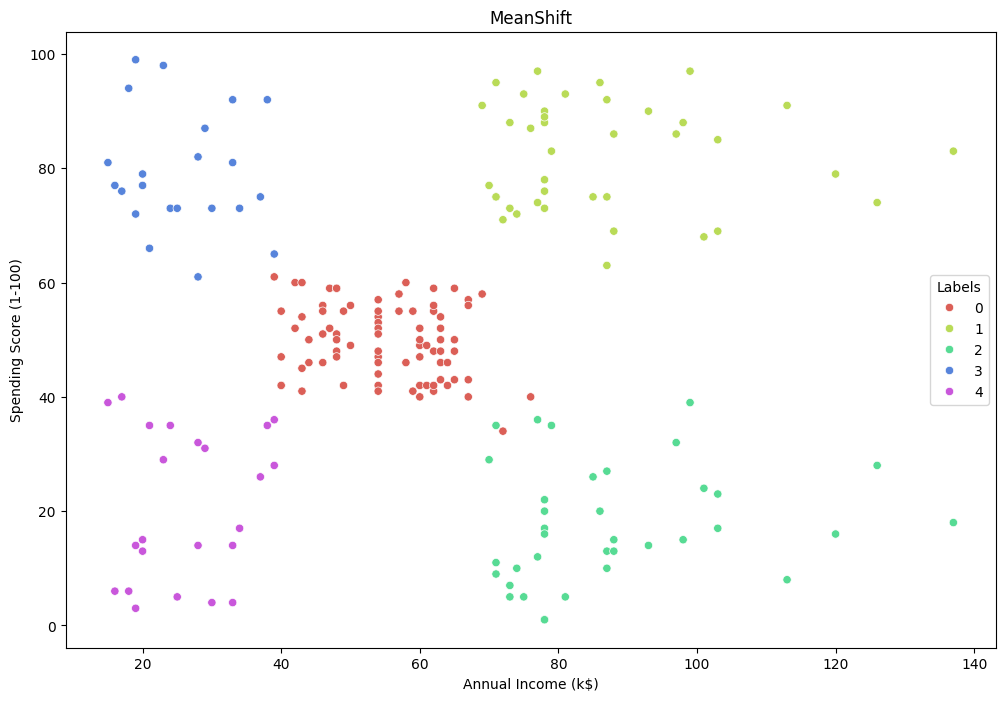

In [36]:
from sklearn.cluster import MeanShift, estimate_bandwidth
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming X_numerics is the DataFrame containing the relevant numeric columns.
# The following bandwidth can be automatically detected using
bandwidth = estimate_bandwidth(X_numerics, quantile=0.1)
ms = MeanShift(bandwidth=bandwidth).fit(X_numerics)

X_numerics['Labels'] = ms.labels_  # Add labels to DataFrame

# Visualize clusters
plt.figure(figsize=(12, 8))
sns.scatterplot(x=X_numerics['Annual Income (k$)'], y=X_numerics['Spending Score (1-100)'], 
                hue=X_numerics['Labels'], palette=sns.color_palette('hls', np.unique(ms.labels_).shape[0]))
plt.title('MeanShift')
plt.show()


In [37]:
# Clustering using MeanShift
MS_clustered = X_numerics.copy()
MS_clustered.loc[:, 'Cluster'] = ms.labels_ 

In [38]:
# Grouping the clusters and calculating the size
MS_clust_sizes = MS_clustered.groupby('Cluster').size().to_frame()
MS_clust_sizes.columns = ['MS_size']

# Display the size of each cluster
MS_clust_sizes

,MS_size
Cluster,
0,80
1,39
2,36
3,22
4,23


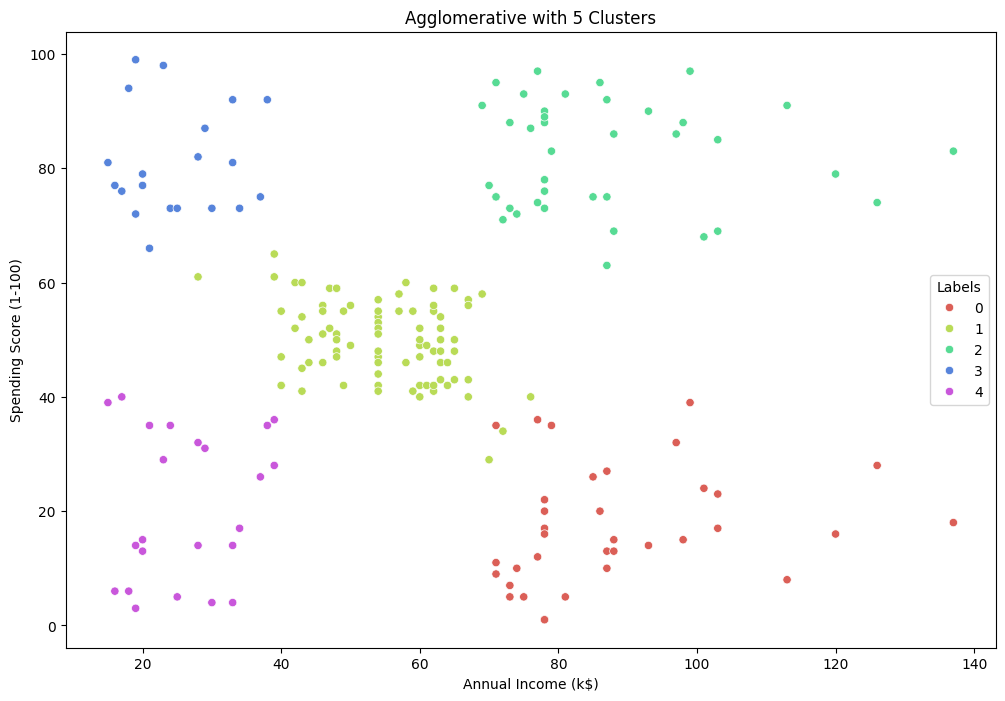

In [42]:
# Agglomerative Clustering: Import AgglomerativeClustering from sklearn
from sklearn.cluster import AgglomerativeClustering
import seaborn as sns
import matplotlib.pyplot as plt

# Applying Agglomerative Clustering
agglom = AgglomerativeClustering(n_clusters=5, linkage='average').fit(X_numerics)

# Add labels to the dataset
X_numerics['Labels'] = agglom.labels_

# Visualizing the clusters
plt.figure(figsize=(12, 8))
sns.scatterplot(x=X_numerics['Annual Income (k$)'], y=X_numerics['Spending Score (1-100)'],
                hue=X_numerics['Labels'], palette=sns.color_palette('hls', 5))
plt.title('Agglomerative with 5 Clusters')
plt.show()


In [43]:
from scipy.cluster import hierarchy
from scipy.spatial import distance_matrix

# Calculate the distance matrix
dist = distance_matrix(X_numerics, X_numerics)
print(dist)


[[  0.          42.05948169  33.03028913 ... 117.12813496 124.53915047
  130.17296186]
 [ 42.05948169   0.          75.01999733 ... 111.76761606 137.77880824
  122.35195135]
 [ 33.03028913  75.01999733   0.         ... 129.89226305 122.24974438
  143.78456106]
 ...
 [117.12813496 111.76761606 129.89226305 ...   0.          57.10516614
   14.35270009]
 [124.53915047 137.77880824 122.24974438 ...  57.10516614   0.
   65.06150936]
 [130.17296186 122.35195135 143.78456106 ...  14.35270009  65.06150936
    0.        ]]


C:\Users\sandhya25\AppData\Local\Temp\ipykernel_55740\1801374360.py:1: ClusterWarning:

The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix



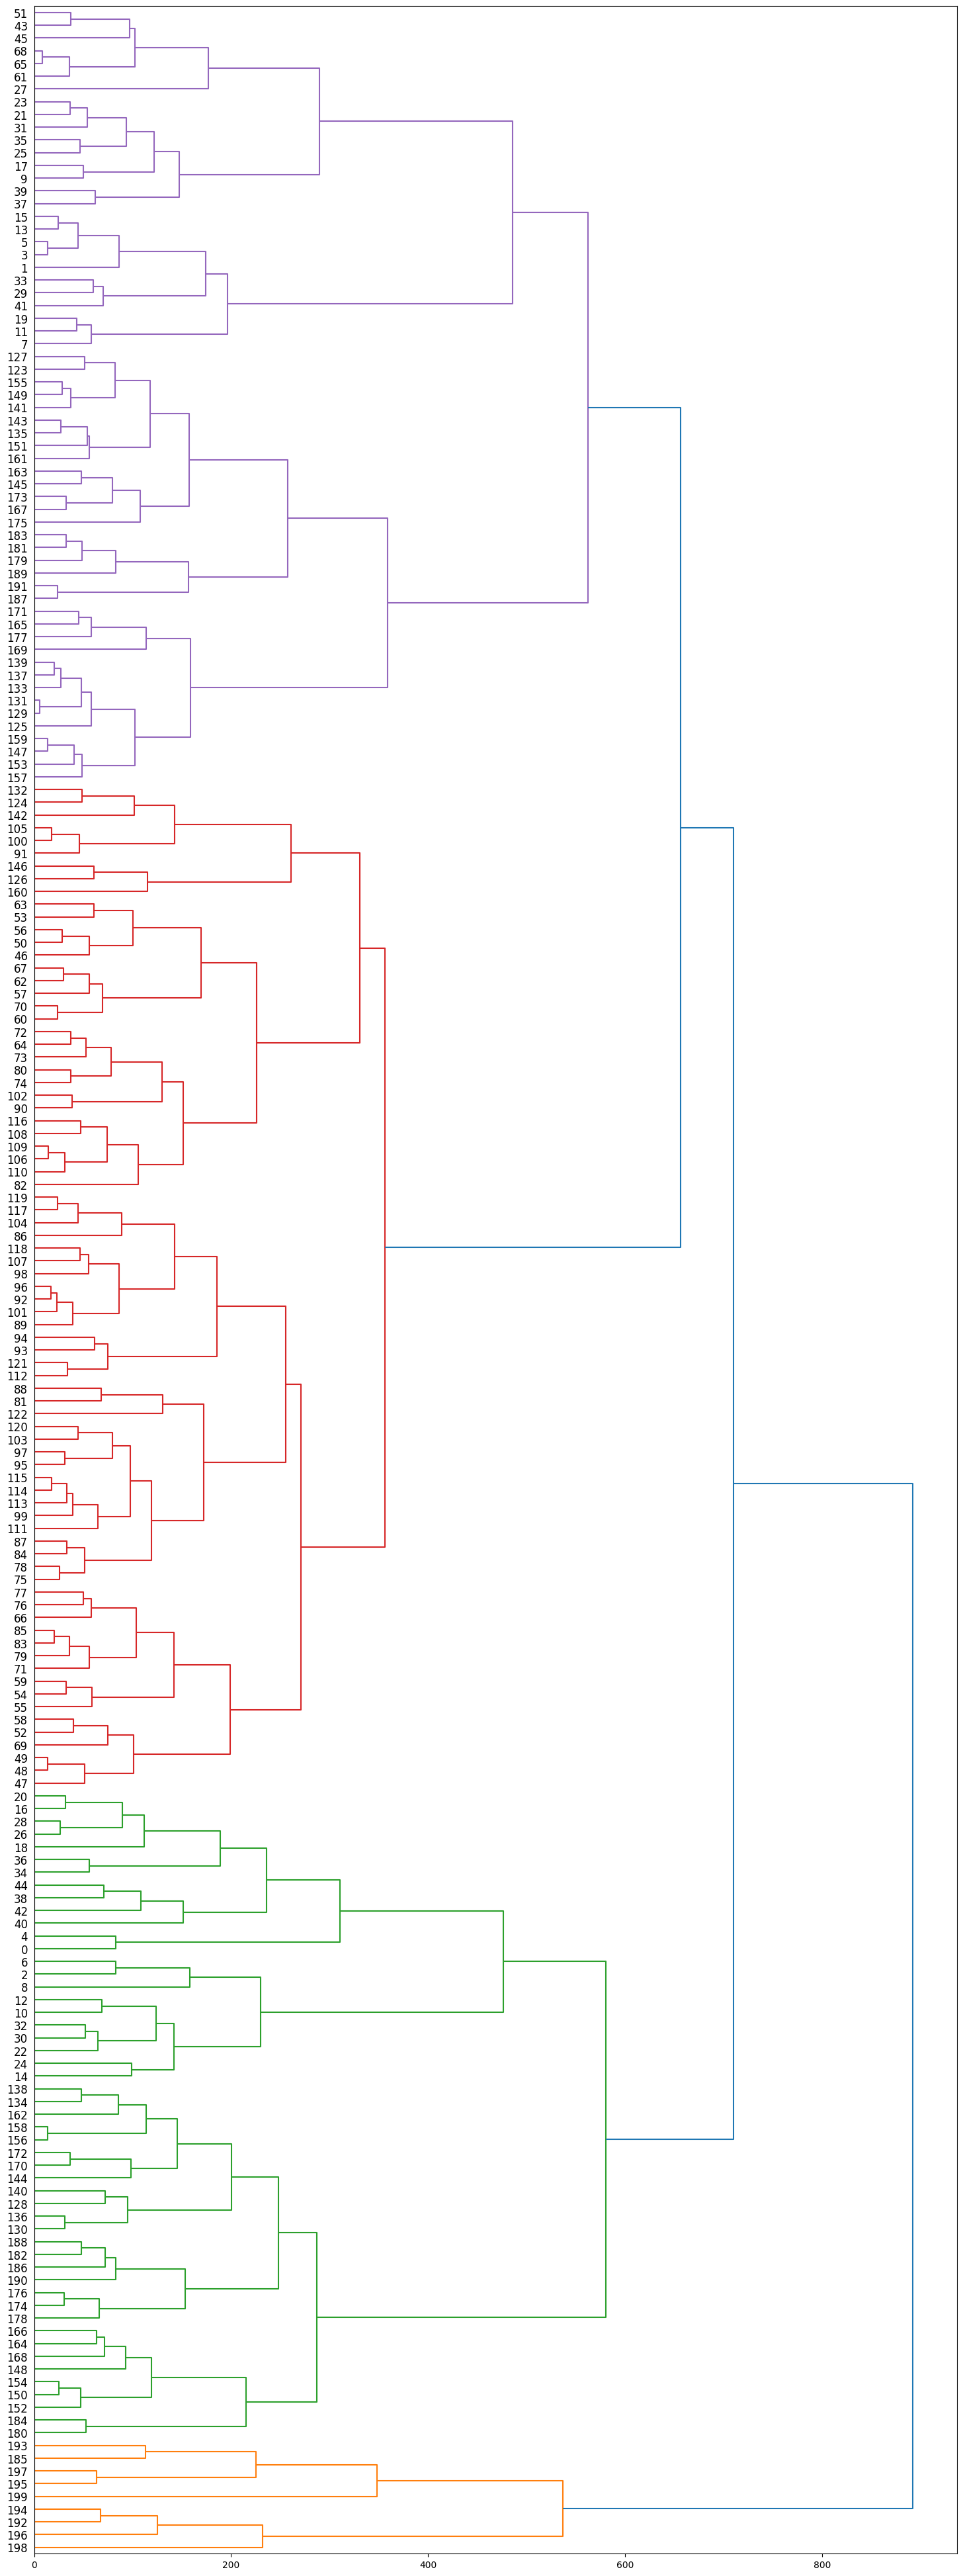

In [46]:
Z = hierarchy.linkage(dist, 'complete')
plt.figure(figsize=(18, 50))
dendro = hierarchy.dendrogram(Z, leaf_rotation=0, leaf_font_size=12, orientation='right')


C:\Users\sandhya25\AppData\Local\Temp\ipykernel_55740\1212895319.py:1: ClusterWarning:

The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix



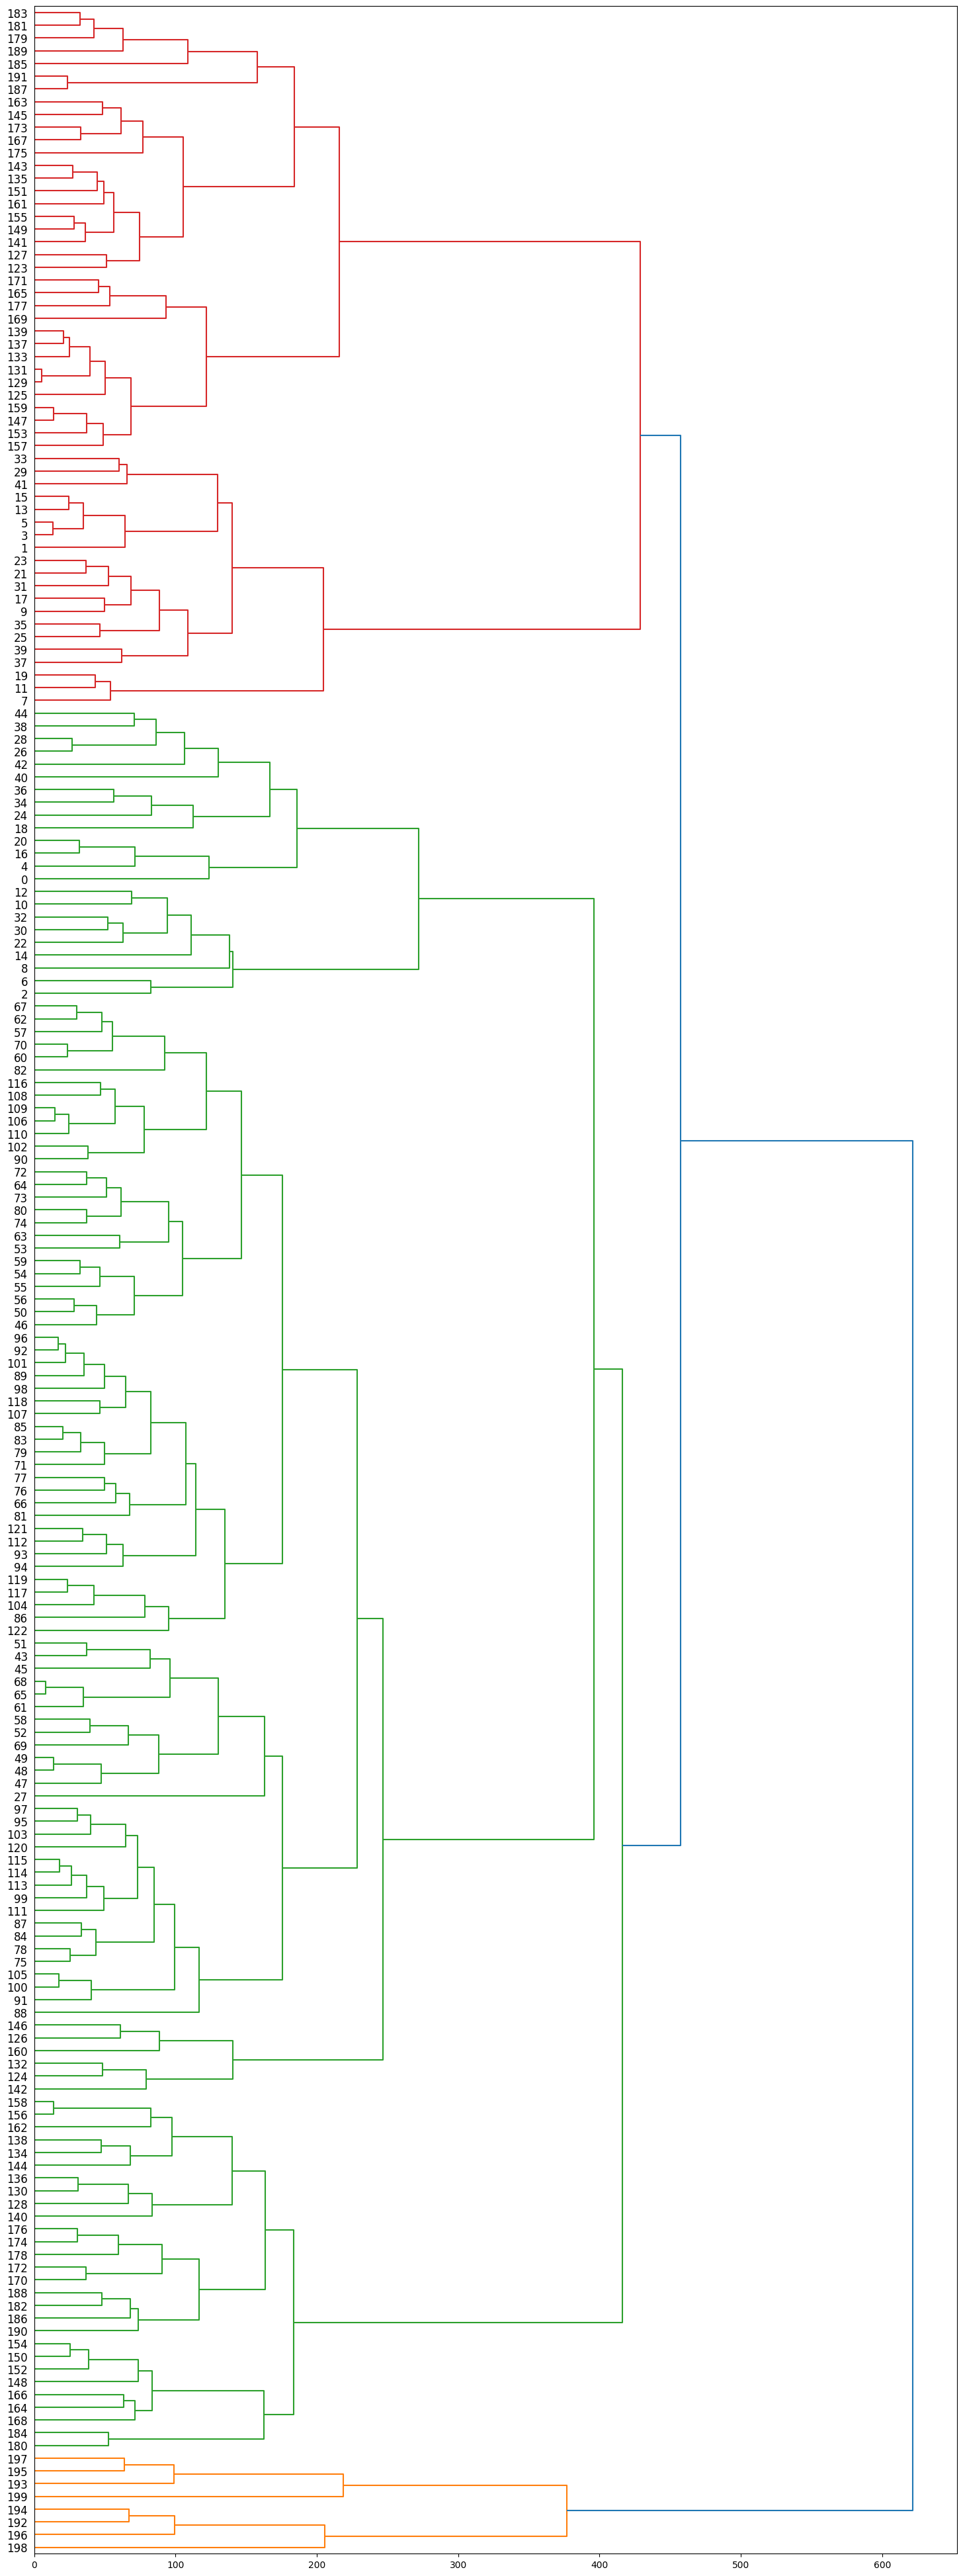

In [48]:
Z = hierarchy.linkage(dist, 'average')
plt.figure(figsize=(18, 50))
dendro = hierarchy.dendrogram(Z, leaf_rotation=0, leaf_font_size=12, orientation='right')


In [49]:
Agg_clustered = X_numerics.copy()  # Creating a copy of the dataset
Agg_clustered.loc[:, 'Cluster'] = agglom.labels_  # Adding cluster labels to the data


In [51]:
Agg_clust_sizes = Agg_clustered.groupby('Cluster').size().to_frame()
Agg_clust_sizes.columns = ["Agg_size"]  # Renaming the column
Agg_clust_sizes

,Agg_size
Cluster,
0,35
1,83
2,39
3,20
4,23


In [57]:
from sklearn.cluster import KMeans
import pandas as pd

# Assuming you already have the dataset `X_numerics` with the relevant features.

# KMeans with 5 clusters
KM5_clustered = X_numerics.copy()
KM5_model = KMeans(n_clusters=5, random_state=42)
KM5_clustered['Cluster'] = KM5_model.fit_predict(X_numerics)

# KMeans with 6 clusters
KM6_clustered = X_numerics.copy()
KM6_model = KMeans(n_clusters=6, random_state=42)
KM6_clustered['Cluster'] = KM6_model.fit_predict(X_numerics)

# DBSCAN clustering
from sklearn.cluster import DBSCAN
DBSCAN_model = DBSCAN(eps=3, min_samples=10)  # Adjust eps and min_samples based on data
DBSCAN_clustered = X_numerics.copy()
DBSCAN_clustered['Cluster'] = DBSCAN_model.fit_predict(X_numerics)

# MeanShift clustering
from sklearn.cluster import MeanShift
MS_model = MeanShift()
MS_clustered = X_numerics.copy()
MS_clustered['Cluster'] = MS_model.fit_predict(X_numerics)

# Agglomerative clustering
from sklearn.cluster import AgglomerativeClustering
Agg_model = AgglomerativeClustering(n_clusters=5, linkage='average')
Agg_clustered = X_numerics.copy()
Agg_clustered['Cluster'] = Agg_model.fit_predict(X_numerics)

# Now you can proceed with the cluster size calculations:

# KMeans with 5 clusters
KM5_clust_sizes = KM5_clustered.groupby('Cluster').size().to_frame()
KM5_clust_sizes.columns = ['KM5_size']

# KMeans with 6 clusters
KM6_clust_sizes = KM6_clustered.groupby('Cluster').size().to_frame()
KM6_clust_sizes.columns = ['KM6_size']

# DBSCAN clusters
DBSCAN_clust_sizes = DBSCAN_clustered.groupby('Cluster').size().to_frame()
DBSCAN_clust_sizes.columns = ['DBSCAN_size']

# MeanShift clusters
MS_clust_sizes = MS_clustered.groupby('Cluster').size().to_frame()
MS_clust_sizes.columns = ['MS_size']

# Agglomerative Clustering clusters
Agg_clust_sizes = Agg_clustered.groupby('Cluster').size().to_frame()
Agg_clust_sizes.columns = ['Agg_size']

# Concatenate all cluster sizes into a single DataFrame
clusters = pd.concat([KM5_clust_sizes, KM6_clust_sizes, DBSCAN_clust_sizes, MS_clust_sizes, Agg_clust_sizes], axis=1, sort=False)

# Display the concatenated result
print(clusters)


         KM5_size  KM6_size  DBSCAN_size  MS_size  Agg_size
Cluster                                                    
 0           89.0      76.0          NaN    200.0      35.0
 1           11.0      10.0          NaN      NaN      83.0
 2           29.0      25.0          NaN      NaN      39.0
 3           38.0      37.0          NaN      NaN      20.0
 4           33.0      29.0          NaN      NaN      23.0
 5            NaN      23.0          NaN      NaN       NaN
-1            NaN       NaN        200.0      NaN       NaN
